In [ ]:
#-# In this project, I will be analyzing the 2019 NFL season play-by-play data. I believe that there are several
#-# tangible, situationally relevant insights that can be gained from this data. My initial plan is as follows:
#--# 1) Exploratory Data Analysis
#---# a) Check Data types
#---# b) Check distributions/correlations
#---# c) Feature engineering (if necessary)
#---# d) Model Iteration
#--# 2) Understand Data/Probabilties
#--# 3) Build Inferences
#--# 4) Test Inferences on New Data (Playoffs '19 or Reg Season '18)


In [ ]:
### First, I need to import the relevant data analysis and visualization package tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
### Second, I must collect, load, and clean my data. I have collected my data in csv form
### from http://nflsavant.com/about.php and have loaded both 2018 and 2019 data into a Pandas DataFrame

pbp19 = pd.read_csv('pbp-2019-2.csv')
pbp18 = pd.read_csv('pbp-2018.csv')
pbp = pd.concat([pbp19,pbp18],ignore_index=True,sort=False)
pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87202 entries, 0 to 87201
Data columns (total 41 columns):
GameId                            87202 non-null int64
GameDate                          87202 non-null object
Quarter                           87202 non-null int64
Minute                            87202 non-null int64
Second                            87202 non-null int64
OffenseTeam                       80656 non-null object
DefenseTeam                       87202 non-null object
Down                              87202 non-null int64
ToGo                              87202 non-null int64
YardLine                          87202 non-null int64
SeriesFirstDown                   87202 non-null int64
Description                       87202 non-null object
SeasonYear                        87202 non-null int64
Yards                             87202 non-null int64
Formation                         85712 non-null object
PlayType                          84188 non-null object
IsRus

In [ ]:
### Get acquainted with data, including data types, common statistical mesaures of variables, and column names
#pbp19.columns
#pbp19.info()
#pbp19.describe()

### After analyzing the data, here are somethings that I've learned:
#   1) There are 39 different features (1 float64, 27 int64, 11 obj)
#   2) There are 42186 examples
#   3) 


In [91]:
### WHAT DATA IS BLANK/UNNECESSARY

## FILTER OUT UNNAMED COLUMNS
# There are some empty columns at the end of my data after
# concatinating yearly data

nfl19 = pbp.iloc[:,0:-2]


## FILTER OUT ROWS FOR OBSCURE PLAY TYPES LIKE CLOCK STOPS, TIMEOUTS, ETC
# Next, I only want to filter rows to look at certain types of plays. Particularly, I am interested in pass plays, 
# run plays, punts, and field goals. I'll use pandas groupby to analyze the playtypes and use
# "isin()" to define the column value conditions to filter my rows and form a robust, clean data set ready to analyze

nfl19.groupby('PlayType').count()
off_plays = ['PASS','RUSH']
downs = [3,4]
formations = ['NO HUDDLE','NO HUDDLE SHOTGUN','SHOTGUN','UNDER CENTER']
nfl_clean = nfl19[nfl19['PlayType'].isin(off_plays)]
nfl_clean = nfl_clean[nfl_clean['Down'].isin(downs)]
nfl_clean = nfl_clean[nfl_clean['ToGo'] <=5]
nfl_clean = nfl_clean[nfl_clean['Formation'].isin(formations)]
nfl_clean.groupby('Formation').count()
nfl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5826 entries, 4 to 87154
Data columns (total 39 columns):
GameId                            5826 non-null int64
GameDate                          5826 non-null object
Quarter                           5826 non-null int64
Minute                            5826 non-null int64
Second                            5826 non-null int64
OffenseTeam                       5826 non-null object
DefenseTeam                       5826 non-null object
Down                              5826 non-null int64
ToGo                              5826 non-null int64
YardLine                          5826 non-null int64
SeriesFirstDown                   5826 non-null int64
Description                       5826 non-null object
SeasonYear                        5826 non-null int64
Yards                             5826 non-null int64
Formation                         5826 non-null object
PlayType                          5826 non-null object
IsRush                

In [58]:
### What particular features are necessary to fully define a play situation?


## Define situation as defined by Time left, Down, Togo, and Yardline - I engineer the feature "TimeLeft" 
## by linearly transforming the Minute and Second columns to one "TimeLeft" column
situation = nfl_clean.loc[:,['Quarter', 'Minute', 'Second', 'Down', 'ToGo', 'YardLine','PlayType','Yards']]
situation['Time Left'] = situation['Minute']*60 + situation['Second']
situation = situation.drop(['Minute','Second'],axis=1)

#sns.scatterplot('Time Left','ToGo',data=situation,hue='PlayType',palette='coolwarm')
#sns.heatmap(situation.drop(['PlayType'],axis=1).corr(),annot=True)

In [13]:
### I've done some basic EDA and essentially have come up with a question to ask:
### Given 'Situation' such that situation provides all necessary variables to define an NFL in-game pre-play 
### situation what "PlayType" should be chosen based on optimizing "Play Success", defined as a function of
### "Yards","SeriesFirstDown", and "IsTouchdown"

In [59]:
#sns.scatterplot('ToGo','Yards',data=nfl_clean,hue='PlayType',palette='coolwarm')

### Plots for categorical data like 'PlayType'
#sns.barplot('PlayType','Yards',data=nfl_clean,estimator=np.std)
#sns.boxplot('PlayType','Yards',data=nfl_clean,hue='SeriesFirstDown')
#sns.barplot('PassType','ToGo',data=nfl_clean,hue='SeriesFirstDown')
#sns.stripplot('PlayType','Yards',data=nfl_clean,jitter=True,hue='IsTouchdown',dodge=True)
sns.factorplot('PlayType','Yards',data=nfl_clean,kind='bar')

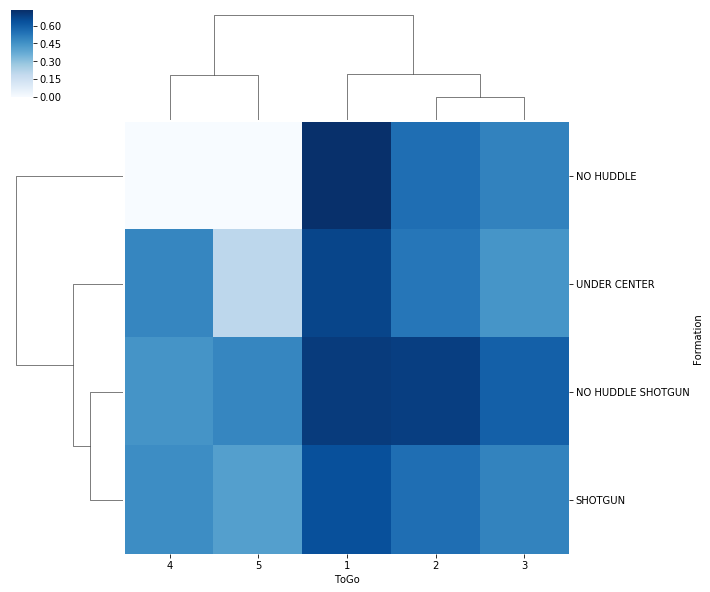

In [85]:
### Pivot Table to better show heatmap and clustermap
nfl_pivot = nfl_clean.pivot_table(index='Formation',columns='ToGo',values='SeriesFirstDown')
#sns.heatmap(nfl_pivot,annot=True,cmap='Reds',linecolor='white',linewidth='1')
sns.clustermap(nfl_pivot,cmap='Blues')

In [ ]:
### OK here we go:
# SITUATION: 3rd and 4th down -- less than 5 yards 
# Ignore Yardline/TimeLeft/Quarter for now
# What PlayType and what formation???


/Users/veeralshah/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


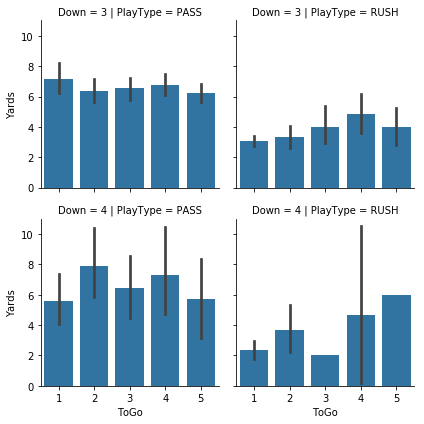

In [89]:
g=sns.FacetGrid(data=nfl_clean,col='PlayType',row='Down')
g.map(sns.barplot,'ToGo','Yards')